<p><font size="6"><b> Introduction to geospatial vector data in Python</b></font></p>


> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

## Importing geospatial data

Geospatial data is often available from specific GIS file formats or data stores, like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database, ...

We can use the GeoPandas library to read many of those GIS file formats (relying on the `fiona` library under the hood, which is an interface to GDAL/OGR), using the `geopandas.read_file` function.

For example, let's start by reading a shapefile with all the countries of the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/, zip file is available in the `/data` directory), and inspect the data:

In [4]:
countries = gpd.read_file("data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [5]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


<Axes: >

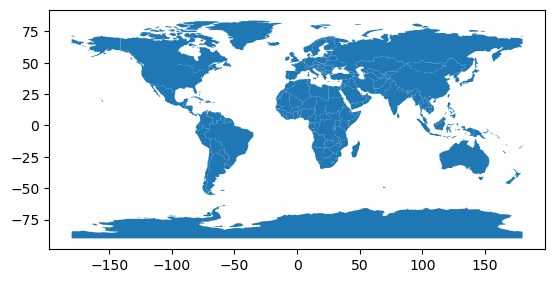

In [6]:
countries.plot()

In [7]:
countries.explore()

What do we observe:

- Using `.head()` we can see the first rows of the dataset, just like we can do with Pandas.
- There is a `geometry` column and the different countries are represented as polygons
- We can use the `.plot()` (matplotlib) or `explore()` (Folium / Leaflet.js) method to quickly get a *basic* visualization of the data

## What's a GeoDataFrame?

We used the GeoPandas library to read in the geospatial data, and this returned us a `GeoDataFrame`:

In [8]:
type(countries)

geopandas.geodataframe.GeoDataFrame

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* It has some extra methods for working with spatial data (area, distance, buffer, intersection, ...), which we will learn in later notebooks

In [9]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [10]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [13]:
countries.geometry.area

C:\Users\Jonny\AppData\Local\Temp\ipykernel_10760\3077649407.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

**It's still a DataFrame**, so we have all the Pandas functionality available to use on the geospatial dataset, and to do data manipulations with the attributes and geometry information together.

For example, we can calculate average population number over all countries (by accessing the 'pop_est' column, and calling the `mean` method on it):

In [14]:
countries['pop_est'].mean()

41712369.84180791

Or, we can use boolean filtering to select a subset of the dataframe based on a condition:

In [15]:
africa = countries[countries['continent'] == 'Africa']

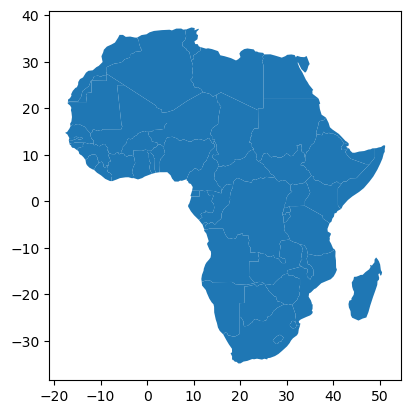

In [16]:
africa.plot();

<div class="alert alert-info" style="font-size:120%">

**REMEMBER:** <br>

* A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations
* A `GeoDataFrame` (or *Feature Collection*) consists of:
    * **Geometries** or **features**: the spatial objects
    * **Attributes** or **properties**: columns with information about each spatial object

</div>

## Geometries: Points, Linestrings and Polygons

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

![](../img/simple_features_3_text.svg)

* **Point** data: represents a single point in space.
* **Line** data ("LineString"): represents a sequence of points that form a line.
* **Polygon** data: represents a filled area.

And each of them can also be combined in multi-part geometries (See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview).

For the example we have seen up to now, the individual geometry objects are Polygons:

In [17]:
print(countries.geometry[2])

POLYGON ((21.0200403174764 40.84272695572588, 20.999989861747224 40.58000397395401, 20.674996779063633 40.43499990494303, 20.615000441172754 40.11000682225935, 20.15001590341052 39.62499766698397, 19.980000441170148 39.69499339452341, 19.960001661873207 39.91500580500605, 19.406081984136733 40.250773423822466, 19.319058872157143 40.72723012955356, 19.40354983895429 41.40956574153546, 19.540027296637106 41.71998607031276, 19.37176883309496 41.877547512370654, 19.37176816334725 41.877550679783496, 19.304486118250793 42.19574514420782, 19.73805138517963 42.68824738216557, 19.801613396898688 42.50009349219084, 20.070700000000045 42.58863000000008, 20.283754510181893 42.32025950781508, 20.522950000000037 42.21787000000006, 20.590246546680227 41.855408919283626, 20.59024743010491 41.855404161133606, 20.463175083099202 41.51508901627534, 20.605181919037364 41.086226304685226, 21.0200403174764 40.84272695572588))


Let's import some other datasets with different types of geometry objects.

A dateset about cities in the world (adapted from http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/, zip file is available in the `/data` directory), consisting of Point data:

In [18]:
cities = gpd.read_file("data/ne_110m_populated_places.zip")

In [19]:
print(cities.geometry[0])

POINT (12.453386544971766 41.903282179960115)


And a dataset of rivers in the world (from http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/, zip file is available in the `/data` directory) where each river is a (multi-)line:

In [20]:
rivers = gpd.read_file("data/ne_50m_rivers_lake_centerlines.zip")

In [21]:
print(rivers.geometry[0])

LINESTRING (51.9371337598152 55.70106609892139, 51.880866467313695 55.68625891701544, 51.82031249962222 55.697455145538584, 51.747601827462404 55.69366250841807, 51.6628417966117 55.608172918745254, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.508544921610905 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.213062548697735 55.50264985760492, 51.13452148447897 55.48273346527725, 51.079345702742046 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.401190496444315, 50.07802734358711 55.381122137576654, 49.822167968676865 55.334662176818085, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


### The `shapely` library

The individual geometry objects are provided by the [`shapely`](https://shapely.readthedocs.io/en/stable/) library

In [23]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

To construct one ourselves:

In [24]:
from shapely import Point, Polygon, LineString

In [25]:
p = Point(0, 0)

In [26]:
print(p)

POINT (0 0)


In [27]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [28]:
polygon.area

0.5

In [29]:
polygon.distance(p)

1.4142135623730951

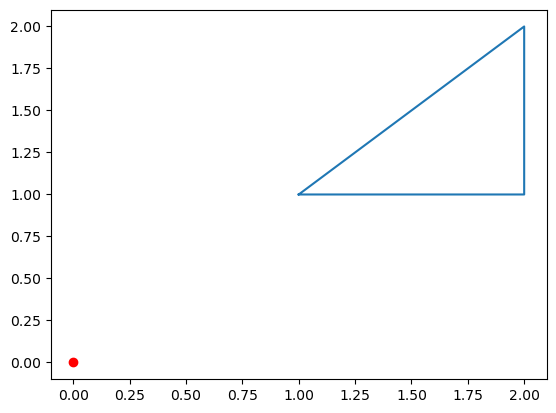

In [42]:
import matplotlib.pyplot as plt

# need scatter to plot shapely point object
# note that * is the unpacking operator
plt.plot(*polygon.exterior.xy)
plt.scatter(*p.xy, c = 'r')

In [45]:
# note use cases of unpacking operator
first, *unused, last = [1, 2, 3, 5, 7]
unused

[2, 3, 5]

In [46]:
# convention is to use _ for dummy variable
first, *_, last = [1, 2, 3, 5, 7]
_

[2, 3, 5]

In [48]:
# weirdly, * requires you to specify it in conjunction with a tuple
*strings, = 'Python is great'

strings

['P', 'y', 't', 'h', 'o', 'n', ' ', 'i', 's', ' ', 'g', 'r', 'e', 'a', 't']

In [50]:
polygon.exterior.xy

(array('d', [1.0, 2.0, 2.0, 1.0]), array('d', [1.0, 2.0, 1.0, 1.0]))

In [52]:
*polygon.exterior.xy,

(array('d', [1.0, 2.0, 2.0, 1.0]), array('d', [1.0, 2.0, 1.0, 1.0]))

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

Single geometries are represented by `shapely` objects:

* If you access a single geometry of a GeoDataFrame, you get a shapely geometry object
* Those objects have similar functionality as geopandas objects (GeoDataFrame/GeoSeries). For example:
    * `single_shapely_object.distance(other_point)` -> distance between two points
    * `geodataframe.distance(other_point)` ->  distance for each point in the geodataframe to the other point

</div>

## Plotting our different layers together

[(-20.0, 60.0), (-40.0, 40.0)]

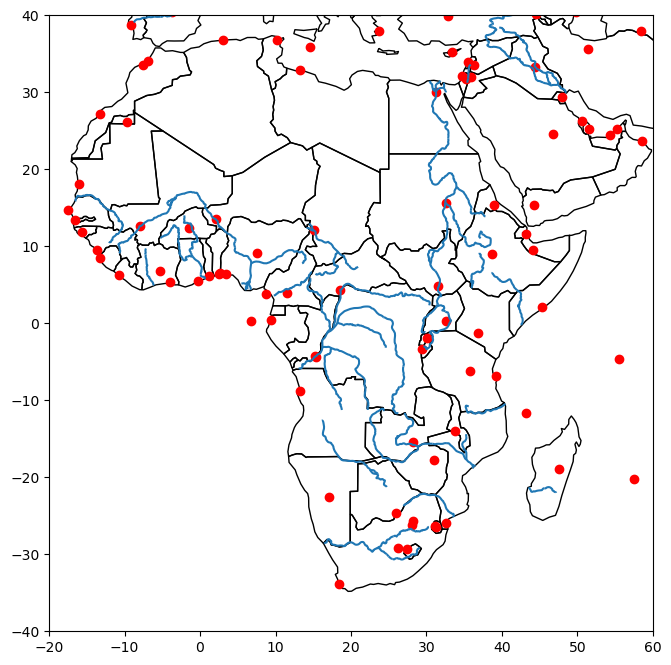

In [53]:
# fig, ax = plt.subplots(figsize=(10, 8))
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(10, 8))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

See the [visualization-02-geopandas.ipynb](visualization-02-geopandas.ipynb) notebook for more details on visualizing geospatial datasets.

## Let's practice!

Throughout the exercises in this course, we will work with several datasets about the city of Paris.

Here, we start with the following datasets:

- The administrative districts of Paris (https://opendata.paris.fr/explore/dataset/quartier_paris/): `paris_districts_utm.geojson`
- Real-time (at the moment I downloaded them ..) information about the public bicycle sharing system in Paris (vélib, https://opendata.paris.fr/explore/dataset/stations-velib-disponibilites-en-temps-reel/information/): `data/paris_bike_stations_mercator.gpkg`

Both datasets are provided as spatial datasets using a GIS file format.

Let's explore further those datasets, now using the spatial aspect as well.

<div class="alert alert-success">

**EXERCISE 1**:

We will start with exploring the bicycle station dataset (available as a GeoPackage file: `data/paris_bike_stations_mercator.gpkg`)
    
* Read the stations datasets into a GeoDataFrame called `stations`.
* Check the type of the returned object
* Check the first rows of the dataframes. What kind of geometries does this datasets contain?
* How many features are there in the dataset? 
    
<details><summary>Hints</summary>

* Use `type(..)` to check any Python object type
* The `geopandas.read_file()` function can read different geospatial file formats. You pass the file name as first argument.
* Use the `.shape` attribute to get the number of features

</details>
    
    
</div>

In [55]:
stations = gpd.read_file('data/paris_bike_stations_mercator.gpkg')

stations.geometry.type.unique()

array(['Point'], dtype=object)

In [57]:
stations.shape[0]

1226

In [ ]:
# %load _solutions/02-introduction-geospatial-data1.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data2.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data3.py

In [59]:
# %load _solutions/02-introduction-geospatial-data4.py
stations.shape

(1226, 4)

<div class="alert alert-success">

**EXERCISE 2**:

* Make a quick plot of the `stations` dataset.
* Make the plot a bit larger by setting the figure size to (12, 6) (hint: the `plot` method accepts a `figsize` keyword).
 
</div>

In [62]:
# yo wtf i never realized this lmao
stations.explore()

In [ ]:
# %load _solutions/02-introduction-geospatial-data5.py

A plot with just some points can be hard to interpret without any spatial context. We have seen that we can use the `explore()` method to easily get an interactive figure that by default includes a background map. But also for the static matplotlib-based plot, it can be useful to add such a base map, and that's what we will learn in the next excercise.

We are going to make use of the [contextily](https://github.com/darribas/contextily) package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object (returned by dataframe's `plot()` method) to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.


<div class="alert alert-success">

**EXERCISE 3**:

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `stations`, but assign the result to an `ax` variable.
* Set the marker size equal to 5 to reduce the size of the points (use the `markersize` keyword of the `plot()` method for this).
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

</div>

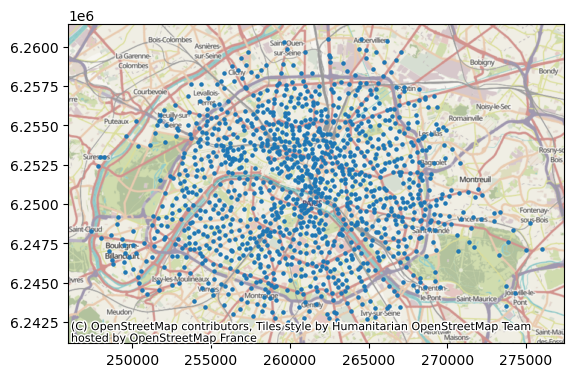

In [65]:
import contextily

ax = stations.plot(markersize = 5)
contextily.add_basemap(ax = ax)


In [ ]:
# %load _solutions/02-introduction-geospatial-data6.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data7.py

<div class="alert alert-success">

**EXERCISE 4**:

* Make a histogram showing the distribution of the number of bike stands in the stations.

<details>
  <summary>Hints</summary>

* Selecting a column can be done with the square brackets: `df['col_name']`
* Single columns have a `hist()` method to plot a histogram of its values.
    
</details>
    
</div>

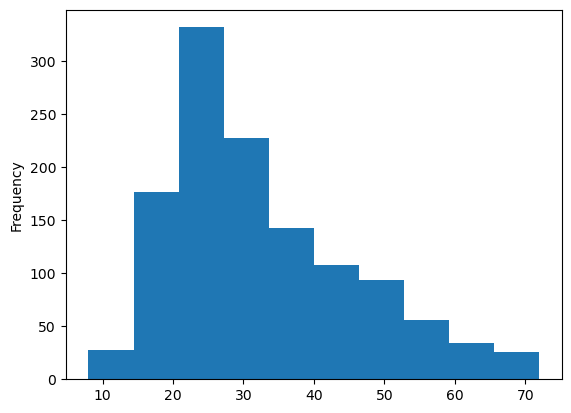

In [69]:
stations['bike_stands'].plot.hist();

In [ ]:
# %load _solutions/02-introduction-geospatial-data8.py

<div class="alert alert-success">

**EXERCISE 5**:

Let's now visualize where the available bikes are actually stationed:
    
* Make a plot of the `stations` dataset (also with a (12, 6) figsize).
* Use the `'available_bikes'` columns to determine the color of the points. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.
 
</div>

C:\Users\Jonny\anaconda3\envs\gdal_new\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

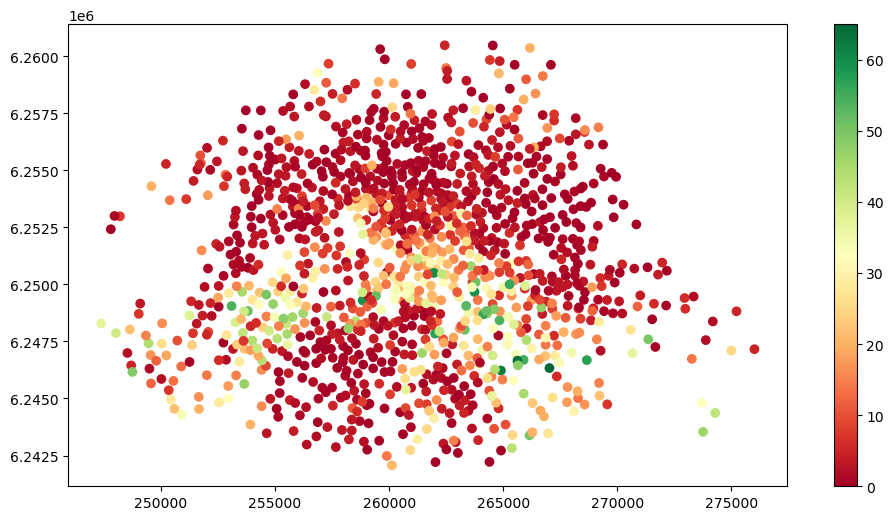

In [79]:
stations.plot(figsize = (12,6), column = 'available_bikes', legend = True, cmap = 'RdYlGn')

In [ ]:
# %load _solutions/02-introduction-geospatial-data9.py

<div class="alert alert-success">

**EXERCISE 6**:

Next, we will explore the dataset on the administrative districts of Paris (available as a GeoJSON file: "data/paris_districts_utm.geojson")

* Read the dataset into a GeoDataFrame called `districts`.
* Check the first rows of the dataframe. What kind of geometries does this dataset contain?
* How many features are there in the dataset? (hint: use the `.shape` attribute)
* Make a quick plot of the `districts` dataset (set the figure size to (12, 6)).
    
</div>

In [80]:
districts = gpd.read_file('data/paris_districts_utm.geojson')

districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [81]:
districts.shape[0]

80

<Axes: >

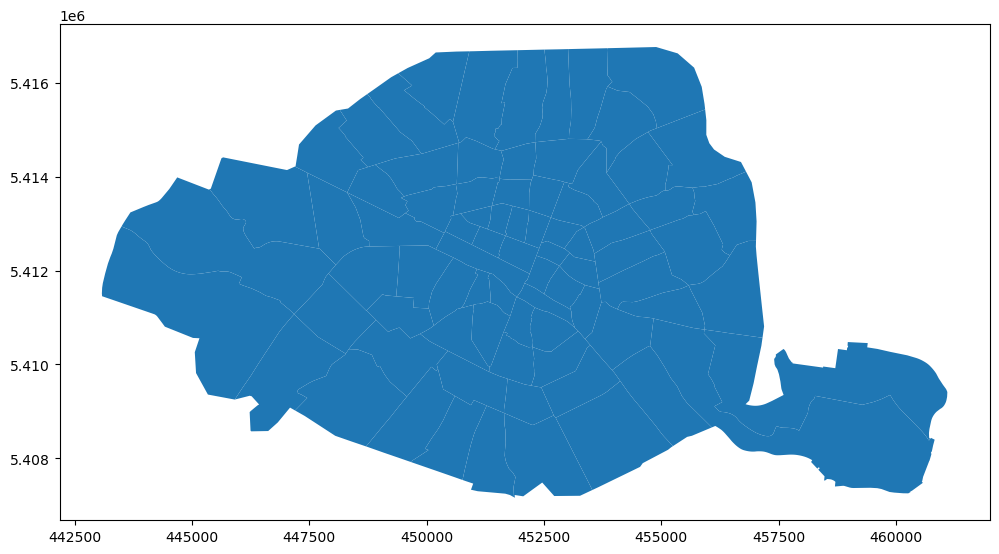

In [82]:
districts.plot(figsize = (12,8))

In [ ]:
# %load _solutions/02-introduction-geospatial-data10.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data11.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data12.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data13.py

<div class="alert alert-success">

**EXERCISE 7**:
    
What are the largest districts (biggest area)?

* Calculate the area of each district.
* Add this area as a new column to the `districts` dataframe.
* Sort the dataframe by this area column for largest to smallest values (descending).

<details><summary>Hints</summary>

* Adding a column can be done by assigning values to a column using the same square brackets syntax: `df['new_col'] = values`
* To sort the rows of a DataFrame, use the `sort_values()` method, specifying the colum to sort on with the `by='col_name'` keyword. Check the help of this method to see how to sort ascending or descending.

</details>

</div>

In [88]:
districts['area'] = districts['geometry'].area / 1e6

In [89]:
districts.sort_values(by = 'area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",0.271603
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",0.243418
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",0.213201


In [ ]:
# %load _solutions/02-introduction-geospatial-data14.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data15.py
# dividing by 10^6 for showing km²
districts['area'] = districts.geometry.area / 1e6

In [86]:
# %load _solutions/02-introduction-geospatial-data16.py
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383e+06
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679e+06
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841e+06
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037e+06
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061e+06
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",2.716030e+05
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",2.693111e+05
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",2.434179e+05
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",2.132014e+05


<div class="alert alert-success">

**EXERCISE 8**:

* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons. For this, use the `column=` keyword.
* Use the `legend=True` keyword to show a color bar.

</div>

In [91]:
districts['population_density'] = districts['population'] / districts['area']

C:\Users\Jonny\anaconda3\envs\gdal_new\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

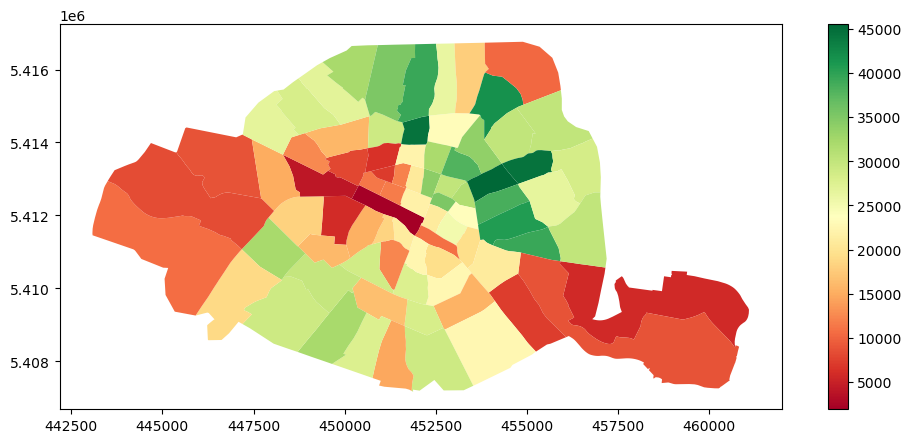

In [95]:
districts.plot(column = 'population_density', cmap = 'RdYlGn', legend = True, figsize = (12,5))

In [ ]:
# %load _solutions/02-introduction-geospatial-data17.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data18.py

In [ ]:
# %load _solutions/02-introduction-geospatial-data19.py

---

## For the curious: A bit more on importing and creating GeoDataFrames

### Note on `fiona`

Under the hood, GeoPandas uses the [Fiona library](http://toblerity.org/fiona/) (pythonic interface to GDAL/OGR) to read and write data. GeoPandas provides a more user-friendly wrapper, which is sufficient for most use cases. But sometimes you want more control, and in that case, to read a file with fiona you can do the following:

In [ ]:
import fiona
from shapely.geometry import shape

with fiona.Env():
    with fiona.open("zip://./data/ne_110m_admin_0_countries.zip") as collection:
        for feature in collection:
            # ... do something with geometry
            geom = shape(feature['geometry'])
            # ... do something with properties
            print(feature['properties']['name'])

### Constructing a GeoDataFrame manually

In [ ]:
geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

### Creating a GeoDataFrame from an existing dataframe

For example, if you have lat/lon coordinates in two columns:

In [ ]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf

See https://geopandas.org/en/latest/gallery/create_geopandas_from_pandas.html for full example